In [1]:
import pandas as pd
import scanpy as sc
from flask import Flask, jsonify, request
from scipy.io import mmread
from scipy import sparse
import seaborn as sns
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import h5py
import csv
import os
import loompy
import anndata
from pandas import HDFStore
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import collections
import scipy.sparse as sp_sparse
import tables
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import umap

In [2]:
adata = sc.read_10x_h5("../Data/Filtered_feature_bc_matrix.h5")

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata.var_names_make_unique()
umi_counts = adata.to_df()
umi_counts

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
AAACAGGGTCTATATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTTCCCGGATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTGTTTCACATCCAGG-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


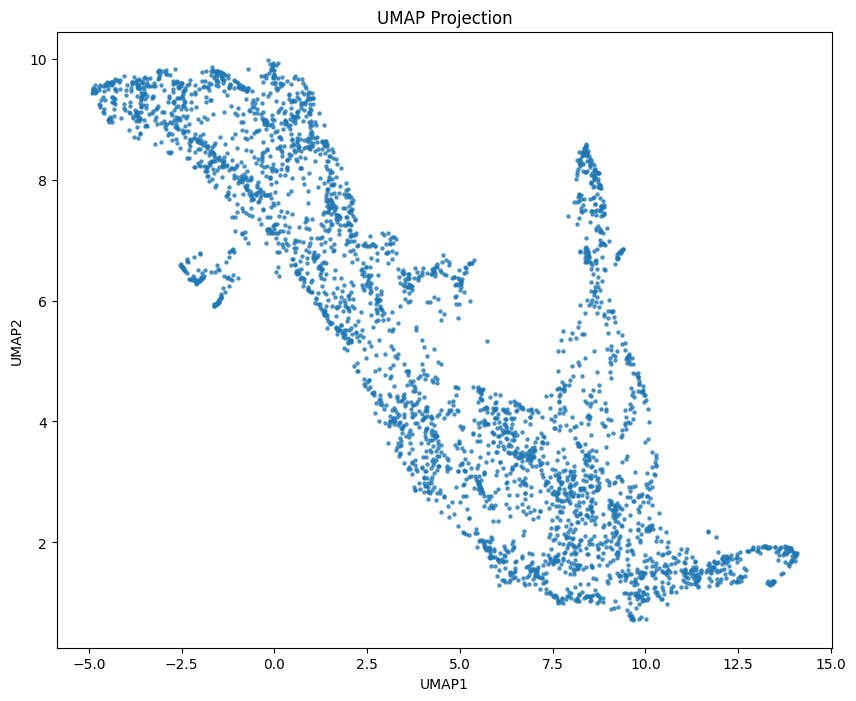

In [22]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(umi_counts.values)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.7)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Projection')
plt.show()

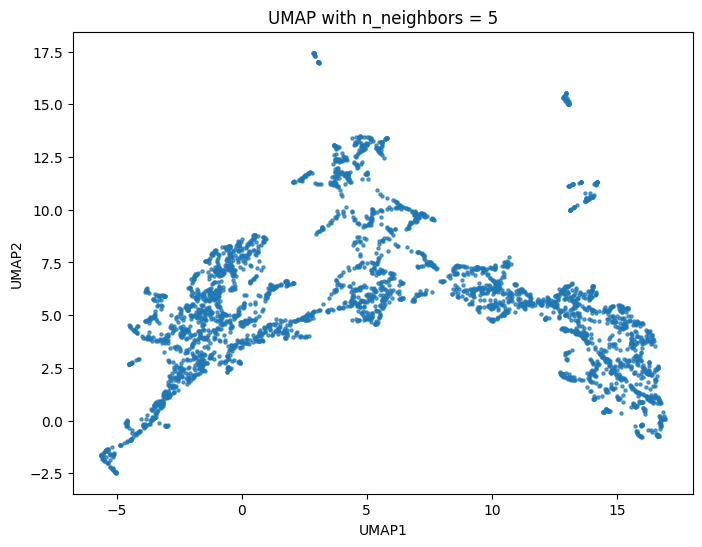

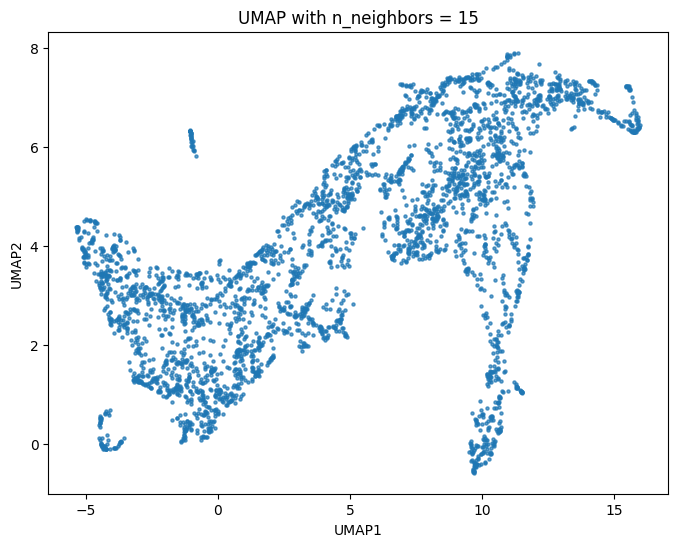

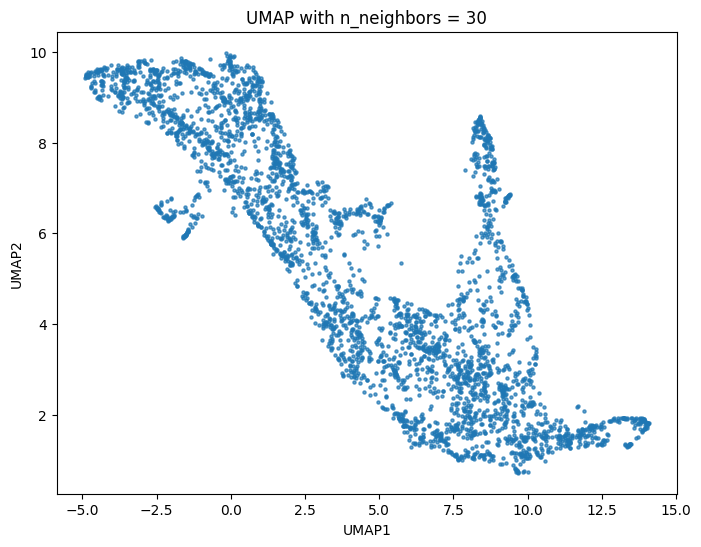

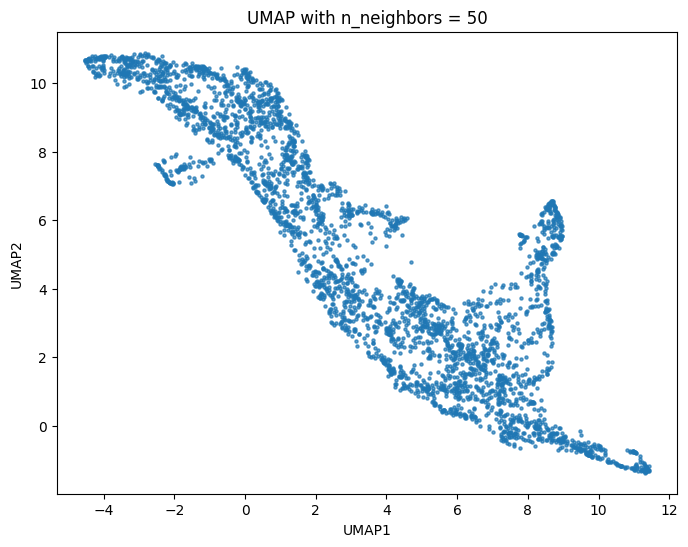

In [18]:
import umap
import matplotlib.pyplot as plt

# List of n_neighbors to test
neighbor_values = [5, 15, 30, 50]

# Iterate over different n_neighbors
for n in neighbor_values:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42)
    embedding = reducer.fit_transform(umi_counts.values)
    
    # Plot UMAP embedding
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.7)
    plt.title(f'UMAP with n_neighbors = {n}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()


In [20]:
n_clusters = 9  # Adjust this based on your data and needs

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embedding)

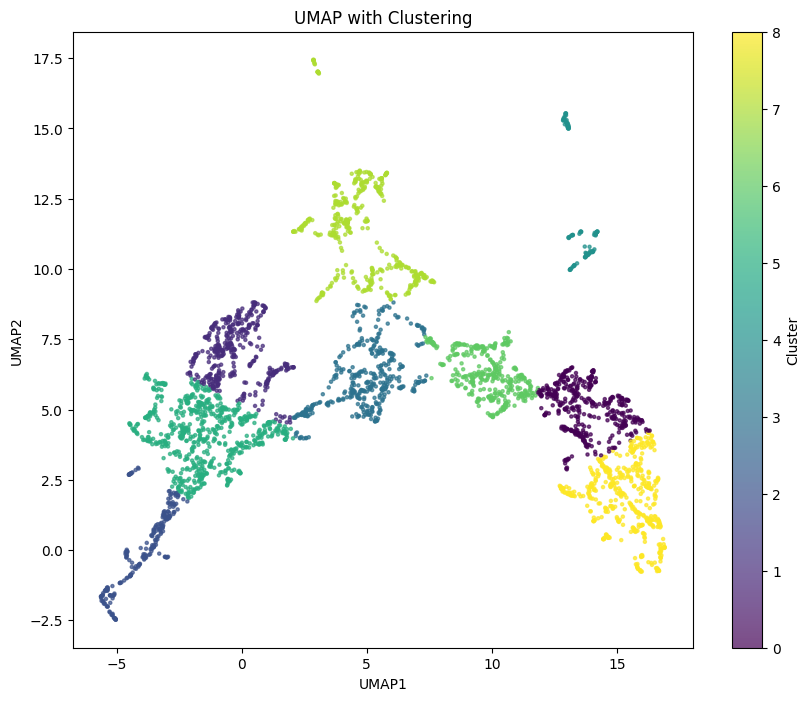

In [21]:
# Plot UMAP with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', s=5, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP with Clustering')
plt.show()
